# Exercise 11

## Exercise 1 - Implement K-Nearest Neighbour

### Importing libraries

In [853]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
import random
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### Splitting the data to train and test

In [2]:
def split_data(X,y,testsize):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize)
    return X_train, X_test, y_train, y_test

### Get numeric for Class names

In [3]:
def numeric_class(data):
    data['class'] = pd.factorize(irisdata['class'])[0] + 1
    return data

### Euclidean distance measure

In [4]:
def euclidean_distance(train_var,test_var):
    distance = 0
    for i in range(0,len(train_var)):
        distance += (train_var[i] - test_var[i]) ** 2
    return np.sqrt(distance)

### Get class names

In [610]:
def get_names(data):
    data_name = list()
    irisclass = ["Iris-Setosa","Iris-Versicolour","Iris-Virginica"]
    for i in data:
        data_name.append(irisclass[i-1])
    return data_name

### Predict Class label

In [226]:
def predict_class(neighbours):
    
    neighbours_count = Counter(neighbours)
    predictedclass = list()
    maximum = max(neighbours_count.values())
    for i in (neighbours_count):
        if neighbours_count[i] == maximum:
            predictedclass.append(i)
#     return predictedclass[0]
    if len(predictedclass)>1:
        return random.choice(predictedclass)
    else:
        return predictedclass[0]

### Quality of the prediction measure:

In [786]:
def accuracy(y_test,y_pred_test):
    misclassified_test = 0
    for index,i in enumerate(y_test):
        if i != y_pred_test[index]:
            misclassified_test += 1
    return (len(y_test) - misclassified_test)/len(y_test)

### Criterion for choosing optimal value of k:

In [624]:
def kfold(X_train,Y_train,fold,k):
    split = math.ceil(len(X_train)/fold)
    fold_mcrate = np.zeros((fold,k))
    
    for i in range (0,fold):
        start = i*split
        end = i*split+split
        
        if start ==0:
            fold_Xtest = X_train[start:end]
            fold_Xtrain = X_train[end:]
            fold_Ytest = Y_train[start:end]
            fold_Ytrain = Y_train[end:]
            fold_Xtrainold = fold_Xtrain
        else:
            fold_Xtest = X_train[start:end]
            fold_Xtrain1 = X_train[0:start]
            fold_Xtrain2 = X_train[end:-1]
            fold_Xtrain = np.concatenate((fold_Xtrain1,fold_Xtrain2))
            fold_Ytest = Y_train[start:end]
            fold_Ytrain1 = Y_train[0:start]
            fold_Ytrain2 = Y_train[end:-1]
            fold_Ytrain = np.concatenate((fold_Ytrain1,fold_Ytrain2))
        
        fold_mcrate[i],pred = knn_(fold_Xtrain,fold_Xtest,fold_Ytrain,fold_Ytest,k)

    return fold_mcrate

### K-NN algorithm:

In [532]:
def knn_(X_train, X_test, y_train, y_test,k_val):
    
    mcrate_train = list()
    mcrate_test = list()
    y_pred = list()
    for k in range (1,k_val+1):
        neighbours_test = list()
        distance_test = dict()
        y_pred_test = list()
        neighbours_train = list()
        distance_train = dict()
        y_pred_train = list()
        for i in range(0,len(X_test)):
            test_var = X_test[i]
            for j in range(0,len(X_train)):
                train_var = X_train[j]
                distance_test[(euclidean_distance(train_var,test_var)),j,i] =j 
            for it,a in enumerate(sorted(distance_test)):
                if it < k:
                    neighbours_test.append(y_train[distance_test[a]])
            y_pred_test.append(predict_class(neighbours_test))
            distance_test = dict()
            neighbours_test = list()
        mcrate_test.append(accuracy(y_test,y_pred_test))        
        y_pred.append(y_pred_test)
    return mcrate_test,y_pred

### Importing the data

In [869]:
irisdata = pd.read_csv("iris.data")
irisdata = numeric_class(irisdata)
irisdata.sample(5)

,sepal-length,sepal-width,petal-length,petal-width,class
7,5.0,3.4,1.5,0.2,1
45,4.8,3.0,1.4,0.3,1
28,5.2,3.4,1.4,0.2,1
52,6.9,3.1,4.9,1.5,2
60,5.0,2.0,3.5,1.0,2


### Split dataset to train and test

In [534]:
y = irisdata['class']
X = irisdata.drop(columns='class')
X_train, X_test, y_train, y_test = split_data(X,y,0.3)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Exercise 1

### Function call to return prediction for a given query

In [563]:
k = 15
mcrate_test,y_pred = knn_(X_train, X_test, y_train, y_test,k)

In [568]:
irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [614]:
y_test_class = get_names(y_test)
y_pred_class = get_names(y_pred[k-1])
Prediction = pd.DataFrame(columns=X.columns)
Prediction['sepal-length'] = X_test[:,0]
Prediction['sepal-width'] = X_test[:,1]
Prediction['petal-length'] = X_test[:,2]
Prediction['petal-width'] = X_test[:,3]
Prediction['class'] = y_test_class
Prediction['Prediction Class'] = y_pred_class

In [655]:
print("\nK: ",k)
print("Accuracy of prediction: ",mcrate_test[k-1])
print("Number of misclassifications: ", len(y_test) - (mcrate_test[k-1] * len(y_test)),"\n")
Prediction.head(10)


K:  15
Accuracy of prediction:  0.9777777777777777
Number of misclassifications:  1.0 



,sepal-length,sepal-width,petal-length,petal-width,class,Prediction Class
0,7.7,3.8,6.7,2.2,Iris-Virginica,Iris-Virginica
1,7.2,3.6,6.1,2.5,Iris-Virginica,Iris-Virginica
2,6.3,2.5,5.0,1.9,Iris-Virginica,Iris-Virginica
3,4.5,2.3,1.3,0.3,Iris-Setosa,Iris-Setosa
4,6.8,3.0,5.5,2.1,Iris-Virginica,Iris-Virginica
5,7.4,2.8,6.1,1.9,Iris-Virginica,Iris-Virginica
6,5.5,2.4,3.7,1.0,Iris-Versicolour,Iris-Versicolour
7,6.7,3.1,4.7,1.5,Iris-Versicolour,Iris-Versicolour
8,6.7,3.1,4.4,1.4,Iris-Versicolour,Iris-Versicolour
9,5.4,3.4,1.7,0.2,Iris-Setosa,Iris-Setosa


### Optimize and compare KNN algorithm

In [625]:
fold_mcrate = kfold(X_train,y_train,10,k)
mcrate_cv = list()
for i in range(0,k):
    mcrate_cv.append(np.average(fold_mcrate[:,i]))

In [653]:
optimaldata = pd.DataFrame(columns=range(1,k+1))
optimaldata.loc[0] = mcrate_cv
optimaldata

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.936364,0.918182,0.945455,0.936364,0.954545,0.945455,0.954545,0.937879,0.937879,0.94697,0.94697,0.94697,0.963636,0.937879,0.963636



 Optimal K:  13
 Accuracy:  0.9636363636363636


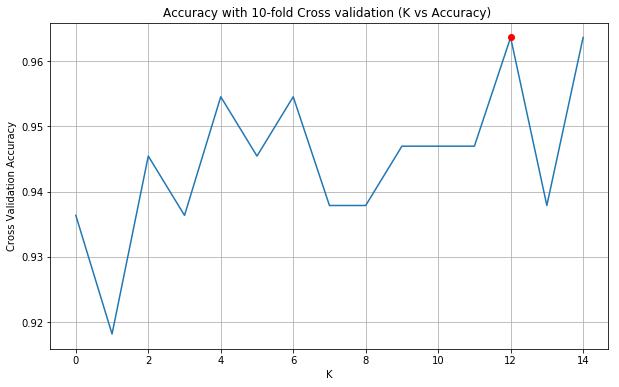

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.936364,0.918182,0.945455,0.936364,0.954545,0.945455,0.954545,0.937879,0.937879,0.94697,0.94697,0.94697,0.963636,0.937879,0.963636


In [654]:
print("\n Optimal K: " ,mcrate_cv.index(max(mcrate_cv))+1)
print(" Accuracy: ",max(mcrate_cv))
plt.figure(figsize=(10,6))
plt.plot(mcrate_cv)
plt.grid()
plt.title("Accuracy with 10-fold Cross validation (K vs Accuracy) ")
plt.plot(mcrate_cv.index(max(mcrate_cv)),max(mcrate_cv),'ro')
plt.xlabel("K")
plt.ylabel("Cross Validation Accuracy")
plt.show()

### Classification using Nearest neighbour  - sklearn

In [695]:
def knn_classifier(X_train,X_test,y_train,y_test,k):
    k_scores = list()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    return y_pred

In [697]:
k = 15
y_pred = knn_classifier(X_train,X_test,y_train,y_test,k)

In [698]:
y_pred_class = get_names(y_pred)
Prediction = pd.DataFrame(columns=X.columns)
Prediction['sepal-length'] = X_test[:,0]
Prediction['sepal-width'] = X_test[:,1]
Prediction['petal-length'] = X_test[:,2]
Prediction['petal-width'] = X_test[:,3]
Prediction['class'] = y_test_class
Prediction['Prediction Class'] = y_pred_class

In [699]:
print("\nK: ",k)
print("Accuracy of prediction: ",accuracy(y_test,y_pred))
print("Number of misclassifications: ", len(y_test) - (accuracy(y_test,y_pred) * len(y_test)),"\n")
Prediction.sample(10)


K:  15
Accuracy of prediction:  0.9777777777777777
Number of misclassifications:  1.0 



,sepal-length,sepal-width,petal-length,petal-width,class,Prediction Class
17,6.4,2.8,5.6,2.1,Iris-Virginica,Iris-Virginica
37,6.5,3.0,5.8,2.2,Iris-Virginica,Iris-Virginica
10,6.9,3.1,4.9,1.5,Iris-Versicolour,Iris-Versicolour
14,7.7,3.0,6.1,2.3,Iris-Virginica,Iris-Virginica
22,5.1,3.5,1.4,0.3,Iris-Setosa,Iris-Setosa
24,6.1,3.0,4.9,1.8,Iris-Virginica,Iris-Virginica
21,6.0,2.9,4.5,1.5,Iris-Versicolour,Iris-Versicolour
13,4.6,3.6,1.0,0.2,Iris-Setosa,Iris-Setosa
15,6.8,3.2,5.9,2.3,Iris-Virginica,Iris-Virginica
33,5.1,3.8,1.6,0.2,Iris-Setosa,Iris-Setosa


### To find optimal hyperparameter for nearest neighbour classifier

In [873]:
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)
print(param_grid)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [874]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [875]:
grid.best_params_,grid.best_score_

({'n_neighbors': 10}, 0.9714285714285714)

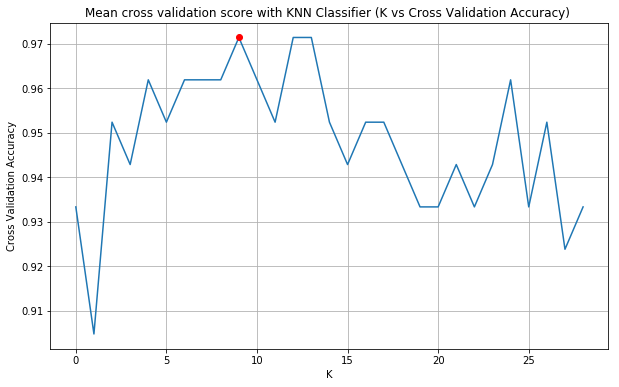

In [876]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(grid.cv_results_['mean_test_score'])
plt.title("Mean cross validation score with KNN Classifier (K vs Cross Validation Accuracy) ")
plt.plot(grid.best_estimator_.n_neighbors-1,grid.best_score_,'ro')
plt.xlabel("K")
plt.ylabel("Cross Validation Accuracy")
plt.show()

In [877]:
knn = KNeighborsClassifier(n_neighbors = grid.best_estimator_.n_neighbors)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [878]:
y_pred_class = get_names(y_pred)
Prediction = pd.DataFrame(columns=X.columns)
Prediction['sepal-length'] = X_test[:,0]
Prediction['sepal-width'] = X_test[:,1]
Prediction['petal-length'] = X_test[:,2]
Prediction['petal-width'] = X_test[:,3]
Prediction['class'] = y_test_class
Prediction['Prediction Class'] = y_pred_class

In [879]:
print("\nOptimal parameter: ",grid.best_estimator_.n_neighbors)
print("Accuracy of prediction: ",accuracy(y_test,y_pred))
print("Number of misclassifications: ", len(y_test) - (accuracy(y_test,y_pred) * len(y_test)),"\n")
Prediction.sample(10)


Optimal parameter:  10
Accuracy of prediction:  0.9777777777777777
Number of misclassifications:  1.0 



,sepal-length,sepal-width,petal-length,petal-width,class,Prediction Class
5,7.4,2.8,6.1,1.9,Iris-Virginica,Iris-Virginica
0,7.7,3.8,6.7,2.2,Iris-Virginica,Iris-Virginica
28,5.0,3.6,1.4,0.2,Iris-Setosa,Iris-Setosa
27,5.4,3.4,1.5,0.4,Iris-Setosa,Iris-Setosa
11,6.7,3.1,5.6,2.4,Iris-Virginica,Iris-Virginica
34,4.8,3.4,1.9,0.2,Iris-Setosa,Iris-Setosa
36,5.6,2.5,3.9,1.1,Iris-Versicolour,Iris-Versicolour
20,4.8,3.0,1.4,0.3,Iris-Setosa,Iris-Setosa
30,5.4,3.7,1.5,0.2,Iris-Setosa,Iris-Setosa
42,5.2,2.7,3.9,1.4,Iris-Versicolour,Iris-Versicolour


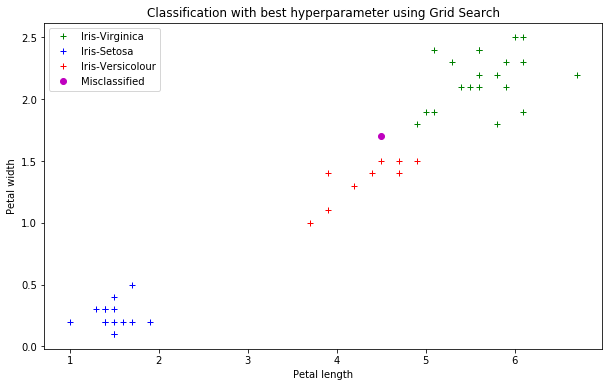

In [850]:
plt.figure(figsize=(10,6))
flag1 = True
flag2 = True
flag3 = True
flag4 = True
for i in Prediction.values:
    if i[4] == 'Iris-Setosa':
        if flag1:
            plt.plot(i[2],i[3],'b+',label = 'Iris-Setosa')
            flag1 = False
        else:
            plt.plot(i[2],i[3],'b+')

    if i[4] == 'Iris-Versicolour':
        if flag2:
            plt.plot(i[2],i[3],'r+',label = 'Iris-Versicolour')
            flag2 = False
        else:
            plt.plot(i[2],i[3],'r+')
            
    if i[4] == 'Iris-Virginica':
        if flag3:
            plt.plot(i[2],i[3],'g+',label = 'Iris-Virginica')
            flag3 = False
        else:
            plt.plot(i[2],i[3],'g+')
            
    if i[4] != i[5]:
        if flag4:
            plt.plot(i[2],i[3],'mo',label = 'Misclassified')
            flag4=False
        else:
            plt.plot(i[2],i[3],'mo')
plt.legend()
plt.title("Classification with best hyperparameter using Grid Search")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

### Classification using Decision Tree Classifier - sklearn

In [777]:
def DecTreeClassifier(X_train,X_test,y_train,y_test):
    
    classifier = DecisionTreeClassifier(random_state=0)
    classifier.fit(X_train,y_train)
    print(classifier.get_params)
    y_pred = classifier.predict(X_test)
    return y_pred

In [788]:
y_pred = DecTreeClassifier(X_train,X_test,y_train,y_test)
acc = accuracy(y_pred,y_test)
acc

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')>


0.9777777777777777

In [862]:
min_samples_splits = np.linspace(0.1, 1.0, 3, endpoint=True)
max_depth = range(1,5)
param_grid = dict(min_samples_split=min_samples_splits,max_depth = max_depth)
print(param_grid)

{'min_samples_split': array([0.1 , 0.55, 1.  ]), 'max_depth': range(1, 5)}


In [863]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid)

In [864]:
grid.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': array([0.1 , 0.55, 1.  ]), 'max_depth': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [865]:
grid.best_params_,grid.best_score_

({'max_depth': 2, 'min_samples_split': 0.1}, 0.9238095238095239)

In [866]:
grid.best_index_

3

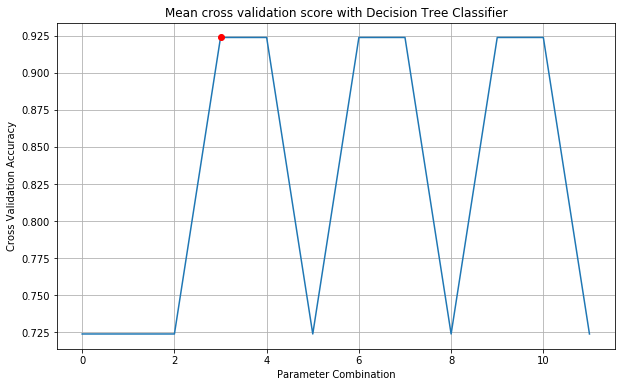

In [867]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(grid.cv_results_['mean_test_score'])
plt.title("Mean cross validation score with Decision Tree Classifier")
plt.plot(grid.best_index_,grid.best_score_,'ro')
plt.xlabel("Parameter Combination")
plt.ylabel("Cross Validation Accuracy")
plt.show()

In [834]:
Classifier = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'],min_samples_split=grid.best_params_['min_samples_split'])
Classifier.fit(X_train,y_train)
y_pred = Classifier.predict(X_test)

In [836]:
y_pred_class = get_names(y_pred)
Prediction = pd.DataFrame(columns=X.columns)
Prediction['sepal-length'] = X_test[:,0]
Prediction['sepal-width'] = X_test[:,1]
Prediction['petal-length'] = X_test[:,2]
Prediction['petal-width'] = X_test[:,3]
Prediction['class'] = y_test_class
Prediction['Prediction Class'] = y_pred_class

In [837]:
print(grid.best_params_)
print("Accuracy of prediction: ",accuracy(y_test,y_pred))
print("Number of misclassifications: ", len(y_test) - (accuracy(y_test,y_pred) * len(y_test)),"\n")
Prediction.sample(10)

{'min_samples_split': 0.1, 'max_depth': 2}
Accuracy of prediction:  0.9555555555555556
Number of misclassifications:  2.0 



,sepal-length,sepal-width,petal-length,petal-width,class,Prediction Class
24,6.1,3.0,4.9,1.8,Iris-Virginica,Iris-Virginica
0,7.7,3.8,6.7,2.2,Iris-Virginica,Iris-Virginica
23,5.8,2.8,5.1,2.4,Iris-Virginica,Iris-Virginica
2,6.3,2.5,5.0,1.9,Iris-Virginica,Iris-Virginica
20,4.8,3.0,1.4,0.3,Iris-Setosa,Iris-Setosa
25,4.9,3.1,1.5,0.1,Iris-Setosa,Iris-Setosa
19,6.4,2.8,5.6,2.2,Iris-Virginica,Iris-Virginica
36,5.6,2.5,3.9,1.1,Iris-Versicolour,Iris-Versicolour
14,7.7,3.0,6.1,2.3,Iris-Virginica,Iris-Virginica
6,5.5,2.4,3.7,1.0,Iris-Versicolour,Iris-Versicolour


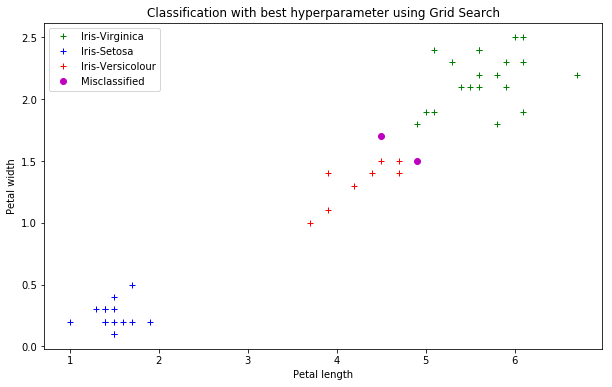

In [838]:
plt.figure(figsize=(10,6))
flag1 = True
flag2 = True
flag3 = True
flag4 = True
for i in Prediction.values:
    if i[4] == 'Iris-Setosa':
        if flag1:
            plt.plot(i[2],i[3],'b+',label = 'Iris-Setosa')
            flag1 = False
        else:
            plt.plot(i[2],i[3],'b+')

    if i[4] == 'Iris-Versicolour':
        if flag2:
            plt.plot(i[2],i[3],'r+',label = 'Iris-Versicolour')
            flag2 = False
        else:
            plt.plot(i[2],i[3],'r+')
            
    if i[4] == 'Iris-Virginica':
        if flag3:
            plt.plot(i[2],i[3],'g+',label = 'Iris-Virginica')
            flag3 = False
        else:
            plt.plot(i[2],i[3],'g+')
            
    if i[4] != i[5]:
        if flag4:
            plt.plot(i[2],i[3],'mo',label = 'Misclassified')
            flag4=False
        else:
            plt.plot(i[2],i[3],'mo')
plt.legend()
plt.title("Classification with best hyperparameter using Grid Search")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()